In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
fifa=pd.read_csv('fifa_data.csv')
fifa.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


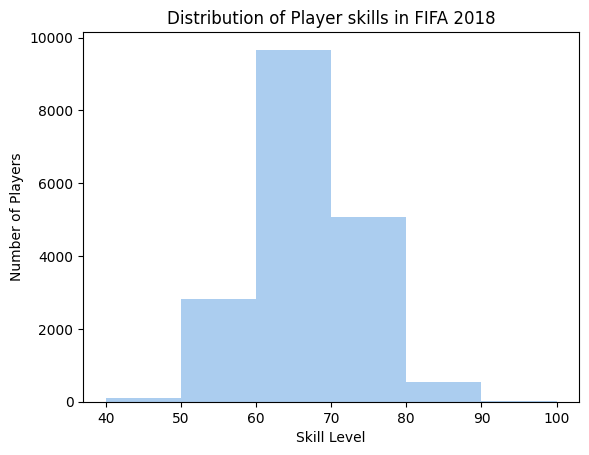

In [3]:
bins1=np.arange(40,101,10)
plt.hist(fifa.Overall,bins=bins1,color='#abcdef')
plt.xticks(bins1)

plt.ylabel('Number of Players')
plt.xlabel('Skill Level')
plt.title('Distribution of Player skills in FIFA 2018')

plt.show()


C:\Users\fidyt\AppData\Local\Temp\ipykernel_12272\1125404861.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  left = fifa.loc[fifa['Preferred Foot']=='Left'].count()[0]
C:\Users\fidyt\AppData\Local\Temp\ipykernel_12272\1125404861.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  right = fifa.loc[fifa['Preferred Foot']=="Right"].count()[0]


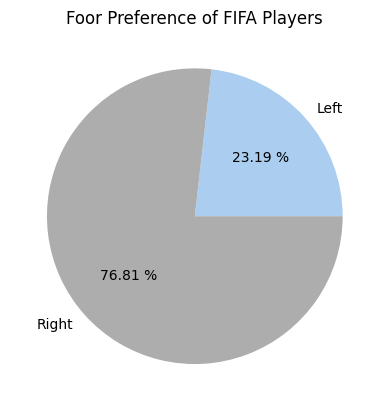

In [4]:
left = fifa.loc[fifa['Preferred Foot']=='Left'].count()[0]

right = fifa.loc[fifa['Preferred Foot']=="Right"].count()[0]

labels=['Left','Right']
color=['#abcdef','#adadad']

plt.pie([left,right],labels=labels,colors=color,autopct='%.2f %%')
plt.title('Foor Preference of FIFA Players')

plt.show()


In [5]:

fifa.Weight=fifa.Weight.str.replace('lbs', '',regex=False).astype(float)*0.453592
fifa.Weight=fifa.Weight.round(2)
fifa.Weight=fifa.Weight.astype(str)+'kg'

In [6]:
fifa.Weight=[float(x.strip('kg')) for x in fifa.Weight]


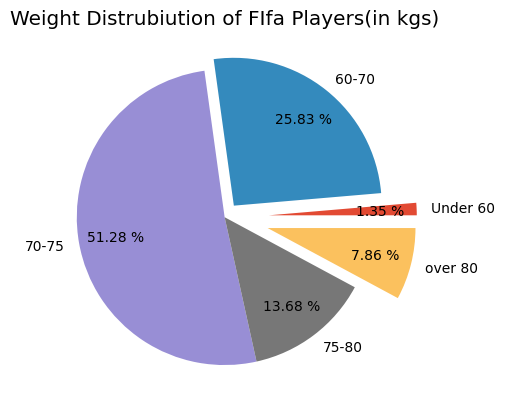

In [7]:
plt.style.use('ggplot')

light= fifa.loc[fifa.Weight<60].count().iloc[0]
light_medium=fifa.loc[(fifa.Weight>=60) & (fifa.Weight< 70)].count().iloc[0]
medium=fifa.loc[(fifa.Weight>=70)& (fifa.Weight< 80)].count().iloc[0]
medium_heavy=fifa.loc[(fifa.Weight>=80)& (fifa.Weight<85)].count().iloc[0]
heavy=fifa.loc[(fifa.Weight >=85)].count().iloc[0]

weights=[light,light_medium,medium,medium_heavy,heavy]
labels=['Under 60','60-70','70-75','75-80','over 80']
explode=(.3,.1,0,0,.3)

plt.title('Weight Distrubiution of FIfa Players(in kgs)')

plt.pie(weights,labels=labels,autopct='%.2f %%',pctdistance=0.75,explode=explode)

plt.show()

C:\Users\fidyt\AppData\Local\Temp\ipykernel_12272\1622396565.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  boxes =plt.boxplot([barcelona,madrid,revs],labels=labels,patch_artist=True)


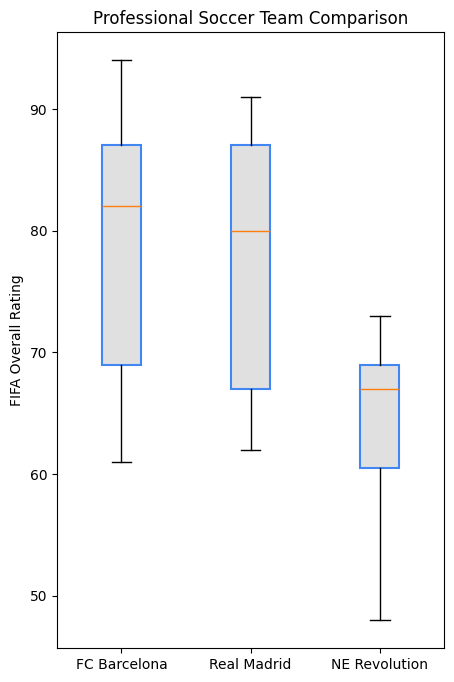

In [37]:

plt.style.use('default')
plt.figure(figsize=(5,8))

barcelona=fifa.loc[fifa.Club=='FC Barcelona']['Overall']
madrid= fifa.loc[fifa.Club=='Real Madrid']['Overall']
revs=fifa.loc[fifa.Club=='New England Revolution']['Overall']

labels=['FC Barcelona','Real Madrid','NE Revolution']

boxes =plt.boxplot([barcelona,madrid,revs],labels=labels,patch_artist=True)


for box in boxes['boxes']:
    # edge color
    box.set(color='#4286f4',linewidth=1.5)
    # fill color
    box.set(facecolor='#e0e0e0')


plt.title("Professional Soccer Team Comparison")
plt.ylabel('FIFA Overall Rating')


plt.show()